# Regresión en Python

En el presente documento ejemplificaremos y revisaremos la aplicación de los algoritmos de regresión para la predicción de valores.  
Utilizaremos los siguientes datos que buscan predecir la probabilidad de un segundo ataque de corazón en pacientes según datos como edad, sexo, colesterol entre otros.   
Primero importaremos las librerías necesarias y los datos:    

In [23]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [2]:
input_file = "./../data/cardiac-training.csv"
df = pd.read_csv(input_file, header=0)
df.head()

,Edad,Estado_civil,Sexo,Categoria_Peso,Colesterol,Manejo_stress,Trat_ansiedad,2do_Ataque_Corazon
0,60,2,0,1,150,1,50,Si
1,69,2,1,1,170,0,60,Si
2,52,1,0,0,174,1,35,No
3,66,2,1,1,169,0,60,Si
4,70,3,0,1,237,0,65,Si


*Separamos entre entradas y salidas*

In [6]:
X = df.loc[:, df.columns != '2do_Ataque_Corazon']
y = df['2do_Ataque_Corazon'].values
X, y

(     Edad  Estado_civil  Sexo  Categoria_Peso  Colesterol  Manejo_stress  \
 0      60             2     0               1         150              1   
 1      69             2     1               1         170              0   
 2      52             1     0               0         174              1   
 3      66             2     1               1         169              0   
 4      70             3     0               1         237              0   
 ..    ...           ...   ...             ...         ...            ...   
 133    54             1     0               0         170              1   
 134    59             1     0               0         172              0   
 135    55             3     0               0         122              1   
 136    73             2     1               1         236              0   
 137    62             3     0               0         185              1   
 
      Trat_ansiedad  
 0               50  
 1               60  
 2      

Formaremos datos de entrenamiento y datos de prueba

In [7]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.30, random_state=
0, shuffle=True)


Con esto pasamos a la construcción del modelo de Regresión Logística de sklearn y su entrenamiento

In [27]:
lr = LogisticRegression(penalty = 'l2', solver='liblinear', max_iter= 1000)
lr = lr.fit(train_X, train_y)

El modelo de Sklearn nos permite especificar varios aspectos del modelo que buscamos construir:  
- Penalty: nos deja especificar que regularización queremos utilizar, entre L1, L2, elasticnet o ninguno.  
- max_iter: la cantidad de iteraciones que permite a los resolventes a converger.  
- solver: resolvente o método para hallar los coeficientes del modelo, entre LBFGS, liblinear, newton-cg, SAG, newton-cholesky o saga.  

Estas configuraciones nos permiten especificar el modelo a nuestra necesidad puntual, ajustarlo a medida de pruebas y obtener el mejor resultado.  

Aplicamos el modelo y evaluamos

Predicted vs Expected
              precision    recall  f1-score   support

          No      0.941     0.842     0.889        19
          Si      0.880     0.957     0.917        23

    accuracy                          0.905        42
   macro avg      0.911     0.899     0.903        42
weighted avg      0.908     0.905     0.904        42

---------------------------------------------------------------------------------


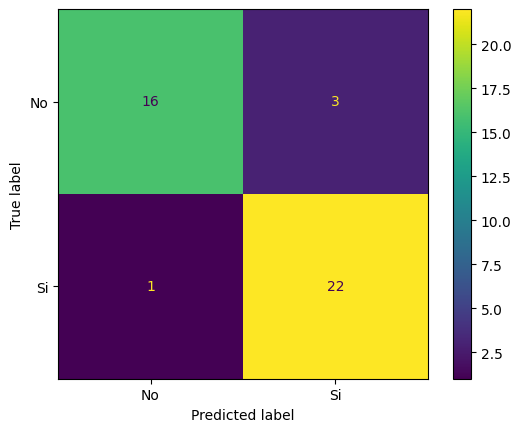

In [28]:
y_pred = lr.predict(test_X)
print("Predicted vs Expected")
print(classification_report(test_y,y_pred, digits=3))
print("---------------------------------------------------------------------------------")
print(ConfusionMatrixDisplay.from_predictions(test_y, y_pred))


Sklearn nos permite fácilmente entrenar el modelo y aplicarlo y obtener métricas y visualizaciones del performance del modelo.  
En el primer retorno podemos resaltar una precisión general del modelo de un 90,5% en general para las clases, siendo un poco mejor prediciendo gente que no sufrirá un segundo ataque (un ~94%) que las clases de que sí lo pueden llegar a sufrir (un ~88%).  
Segundo podemos ver representado la matriz de confusión, que nos permite ver claramente los resultados comparados con la realidad, denotando falsos positivos, falsos negativos y aciertos. Por ejemplo vemos que se predijeron 3 falsos positivos y 1 solo falso negativo.   

## Comparación con resultados en RapidMiner  
A modo de investigación, comparamos resultados del modelo entrenado en Sklearn con una aplicación equivalente en RapidMiner

![Pelican](./images/image-1.png)![Pelican](./images/image-2.png)![Pelican](./images/image-3.png)